# DatasetとDataLoader

In [1]:
import numpy as np
import torchvision
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
from torch.nn import functional as F
from torch import optim
from torchvision import transforms
import matplotlib.pyplot as plt

## Dataset

- torchvision.datasets
    - torchvision.datasetsには様々なDatasetがあり、全てtorch.utils.data.Datasetを継承している
    - torchvision.datasets.MNISTクラスでインスタンスを生成
        - root：データを保存するディレクトリを指定
        - train：Trueなら学習データをFalseならテストデータをロード
        - download：Trueならrootで指定したディレクトリにダウンロードし、既にデータがある場合はそのデータを使用する
    - []でindexingによりデータとラベルをtuple形式で取得する
    - データはPIL(Pillow：Python Imaging Library)で帰ってくるので、transformが必要

In [2]:
# datasetsモジュールに様々なデータセットがある：https://pytorch.org/vision/stable/datasets.html
train_dataset = torchvision.datasets.MNIST(root='./mnist_data', train=True, download=True)

In [3]:
# 変数にデータが格納されているわけではない
# HDD側から呼び出すのでこのディレクトリそのものは48Byteと軽量になる
import sys
sys.getsizeof(train_dataset)

48

In [4]:
image, label = train_dataset[0]

In [5]:
image

In [6]:
label

5

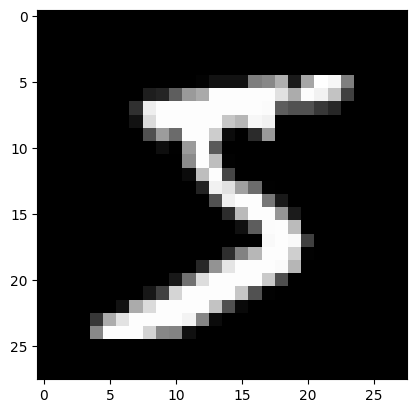

In [7]:
plt.imshow(image, cmap='gray')

In [8]:
len(train_dataset)

60000

## Transform

- torchvision.transforms: 画像関連で使用する便利な変換機能を提供
    - .ToTensor(): [0, 255]の(H, W, C)のPILやNumpyArrayをtensorに変換するクラス
        - インスタンスを生成しPIL形式のデータを渡してcallする
        - 変換後は[0., 1.]の(C, W, H)のtensorとなる
        - C：チャネル、W：横幅、H：高さ
    - .Normalize(): 平均と標準偏差を使って画像データを標準化する
        - mean: それぞれのchannelのmeanをtupleで渡す
        - std: それぞれのchannelのstdをmeanで渡す
        - 正規化として使われることが多い(0~1 → -1~1)
    - .Compose(): 複数のtransformをまとめる
        - 複数のtransformsのインスタンスをリストにして渡す
        - datasets.class名のtransform引数に渡すことで、データをロードする際に変換処理をしてくれる
        - sklearnのpiplineみたいなもの

### ToTensor

In [9]:
image

In [10]:
type(image)

PIL.Image.Image

In [11]:
np.array(image).shape

(28, 28)

In [11]:
transform = transforms.ToTensor()
image_tensor = transform(image)

# インスタンスに対して__call__するので
# image_tensor = torchvision.transforms.ToTensor()(image)

In [12]:
type(image_tensor)

torch.Tensor

In [13]:
# チャネルファーストになり、チャネルが1、横幅28、高さ28のｔｅｎｓｏｒになる
image_tensor.shape

torch.Size([1, 28, 28])

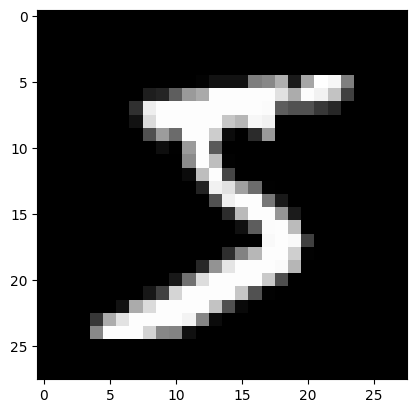

In [14]:
plt.imshow(image_tensor[0], cmap='gray')

### Normalize

In [15]:
# -1~1に各ピクセルが変換されているのがわかる
normalized_image_tensor = transforms.Normalize((0.5, ), (0.5, ))(image_tensor)
normalized_image_tensor

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

### Compose

In [13]:
# Composeを使うことで，複数のTransformを直列にしまとめてくれる．これをDatasetのインスタンス生成時に指定する
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
transformed_image = transform(image)

In [14]:
# 学習データをダウンロードするときにtransform引数に指定することで、上記の形式に変換してデータをダウンロードしてくれる
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True, transform=transform)  # 学習データ
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)  # 検証データ

In [15]:
image, label = train_dataset[0]
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

## DataLoader

- DataLoader
    - torch.utils.data.DataLoaderクラスでインスタンスを生成
        - dataset: ロード対象となるDatasetオブジェクトを指定
        - batch_size: ミニバッチ学習におけるバッチサイズ
        - shuffle: Trueの場合、各epochでシャッフルする
            - 検証データの場合、シャッフルは不要
        - num_workers: データロードに使用するCPUのスレッド数

In [16]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

In [17]:
# ジェネレータのように扱うことが可能
# .__iter__のメソッドを持っている
next(iter(train_loader))

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         ...,
 
 
         [[[-1., -1., -1.,  ..., -

In [20]:
# バッチサイズ　x　チャネル数　x　横幅　x　高さの4つのランクを持つtensorになる
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [22]:
# どういう画像になっているのかを表示する
# torchvision.utils.make_grid：　4つのランクを3つのランクにする
# チャネル数　x 高さ　ｘ　横幅　の3ランクになる
grid_images = torchvision.utils.make_grid(images)
grid_images.shape

torch.Size([3, 122, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


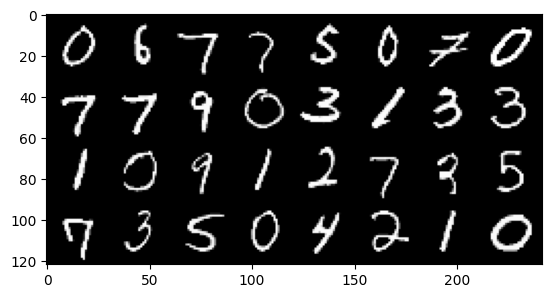

In [23]:
# チャネル数　x 高さ　ｘ　横幅 -> 高さ　x　横幅　x チャネル数にする
plt.imshow(torch.permute(grid_images, (1, 2, 0)))

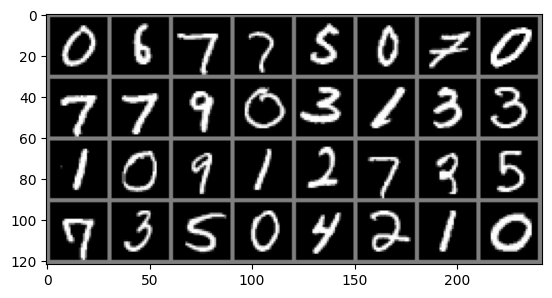

In [24]:
# 標準化を戻してあげるとより正確な画像が出力される
grid_images = grid_images / 2 + 0.5
plt.imshow(torch.permute(grid_images, (1, 2, 0)))

In [25]:
labels

tensor([0, 6, 7, 7, 5, 0, 7, 0, 7, 7, 9, 0, 3, 1, 3, 3, 1, 0, 9, 1, 2, 7, 3, 5,
        7, 3, 5, 0, 4, 2, 1, 0])

## 学習ループに組み込み

- 前レクチャーまでで作成したMNISTのDataLoaderを学習ループに組み込む
- DataLoaderから取得するtensorの形状が[b, c, h, w]なので、[b, c x h x w]にするためにnn.flatten層を追加する

In [26]:
# ================MLP自作クラス=================
# 入力が[batch, ch, h, w]なので，[batch, chzhxw]にするためにnn.Flatten()を追加
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.flatten = nn.Flatten() # [b, c, h, w] -> [b, cxhxw]
        self.l1 = nn.Linear(in_features=num_in, out_features=num_hidden)  # 隠れ層のLinear層
        self.l2 = nn.Linear(in_features=num_hidden, out_features=num_out)  # 出力層のLinear層

    # 順伝播の関数
    def forward(self, x):  
        x = self.l2(F.relu(self.l1(self.flatten(x))))
        return x

In [27]:
## Refactoring後の学習ループ
# ===データの準備====
# モデルの初期化
num_in = 28*28
num_hidden = 30
num_out = 10
model = MLP(num_in, num_hidden, num_out)
# PytorchのOptimizer
learning_rate = 0.01
opt = optim.SGD(model.parameters(), lr=learning_rate)

# ログ
train_losses = []
val_losses = []
val_accuracies = []
for epoch in range(5):
    running_loss = 0.0
    running_val_loss = 0.0
    running_val_accuracy = 0.0
    
    for train_batch, data in enumerate(train_loader):
        
        X, y = data
        
        # mini batch作成 -> 削除

        # 順伝播と逆伝播の計算
        opt.zero_grad()
        # forward
        preds = model.forward(X) 
        loss = F.cross_entropy(preds, y)
        running_loss += loss.item()
        # backward
        loss.backward()
        opt.step()
        
    # validation
    with torch.no_grad():
        for val_batch, data in enumerate(val_loader):
            X_val, y_val = data
            
            preds_val = model(X_val)  
            val_loss = F.cross_entropy(preds_val, y_val)
            running_val_loss += val_loss.item()
            val_accuracy = torch.sum(torch.argmax(preds_val, dim=-1) == y_val) / y_val.shape[0] 
            running_val_accuracy += val_accuracy.item()

    train_losses.append(running_loss/(train_batch + 1))
    val_losses.append(running_val_loss/(val_batch + 1))
    val_accuracies.append(running_val_accuracy/(val_batch + 1))
    print(f'epoch: {epoch}: train error: {train_losses[-1]}, validation error: {val_losses[-1]}, validation accuracy: {val_accuracies[-1]}')

epoch: 0: train error: 0.5849847347736359, validation error: 0.3369315899968052, validation accuracy: 0.9054512779552716
epoch: 1: train error: 0.32861539392868677, validation error: 0.2936305302781419, validation accuracy: 0.9138378594249201
epoch: 2: train error: 0.29509936688145, validation error: 0.2715110492538482, validation accuracy: 0.9226238019169329
epoch: 3: train error: 0.2700524952530861, validation error: 0.25542975938060697, validation accuracy: 0.9270167731629393
epoch: 4: train error: 0.24754871728519598, validation error: 0.22696206791135973, validation accuracy: 0.9358027156549521


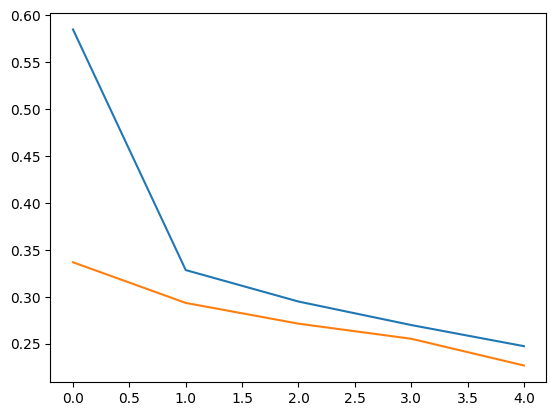

In [28]:
plt.plot(train_losses)
plt.plot(val_losses)

## カスタムのDatasetを作る

- カスタムのDatasetを作るときは、torch.utils.data.Datasetクラスを継承する
- __len__メソッドおよび、__getitem__をオーバーライドする
- transformを引数で受け取り、データに対して変換できるようにする

In [21]:
# =============自作Datasetクラス=============
class MyDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)

        return X, y
    

In [22]:
# sklearnのDatasetでカスタムDatasetを作ってみる
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_digits()
data = dataset['data']
target = dataset['target']
images = dataset['images']
images = images * (255.0 / 16.0)  # 0-16 -> 0-255
images = images.astype(np.uint8)
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(1437, 8, 8)

In [24]:
y_train.shape

(1437,)

In [27]:
train_mydataset = MyDataset(X_train, y_train)

In [29]:
len(train_mydataset)

1437

In [30]:
# 今回train_mydatasetは0〜16の値
# images = images * (255.0 / 16.0)  # 0-16 -> 0-255 で0-255に直していた
train_mydataset[0]

(array([[  0,   0,  47, 223,  15,   0,   0,   0],
        [  0,   0, 191, 191,   0,   0,   0,   0],
        [  0,  47, 255,  95,   0,   0,   0,   0],
        [  0,  79, 255,  31,   0,   0,   0,   0],
        [  0,  95, 255,  31,  79,  31,   0,   0],
        [  0,  63, 255,  31, 191, 239,  31,   0],
        [  0,  15, 223, 207,  31, 207, 175,   0],
        [  0,   0,  47, 175, 255, 207,  63,   0]], dtype=uint8),
 6)

In [32]:
# transformのインスタンスを作り、引数に入力してDatasetを作る
transform = transforms.Compose([
    transforms.ToTensor(),  # 0-255 -> 0-1
    transforms.Normalize((0.5, ), (0.5, ))  # 0-1 -> -1-1
])

train_mydataset = MyDataset(X_train, y_train, transform)
val_mydataset = MyDataset(X_val, y_val, transform)

In [33]:
# -1~1になったのがわかる
train_mydataset[0]

(tensor([[[-1.0000, -1.0000, -0.6314,  0.7490, -0.8824, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -1.0000,  0.4980,  0.4980, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -0.6314,  1.0000, -0.2549, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -0.3804,  1.0000, -0.7569, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -0.2549,  1.0000, -0.7569, -0.3804, -0.7569, -1.0000,
           -1.0000],
          [-1.0000, -0.5059,  1.0000, -0.7569,  0.4980,  0.8745, -0.7569,
           -1.0000],
          [-1.0000, -0.8824,  0.7490,  0.6235, -0.7569,  0.6235,  0.3725,
           -1.0000],
          [-1.0000, -1.0000, -0.6314,  0.3725,  1.0000,  0.6235, -0.5059,
           -1.0000]]]),
 6)

In [34]:
val_my_dataset[0]

NameError: name 'val_my_dataset' is not defined

In [35]:
# DataLoaderを作る
train_myloader = DataLoader(train_mydataset, batch_size=10, shuffle=True, num_workers=2)
val_myloader = DataLoader(val_mydataset, batch_size=10, num_workers=2)

In [36]:
images, labels = next(iter(train_myloader))

print(images.shape)
print(labels.shape)

torch.Size([10])

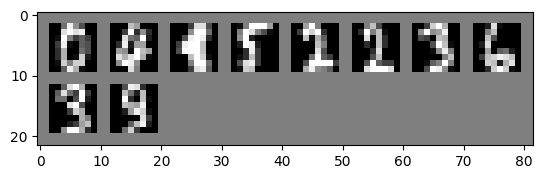

In [83]:
grid_images = torchvision.utils.make_grid(images)
grid_images = grid_images / 2 + 0.5  # -1-1 -> 0-1
plt.imshow(torch.permute(grid_images, (1,2,0)))